<a href="https://colab.research.google.com/github/Patriol-LLC/Google-Colab/blob/main/HTTP_Traffic%20Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First We Load All Dependencies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
print('Step 1 Passed')

Step 1 Passed


**Read The Pcap**

In [39]:
http = pd.read_csv('/content/drive/MyDrive/Colab Data/Wednesday/HTTP Traffic.csv')
http2_cookie = pd.read_csv('/content/drive/MyDrive/Colab Data/Wednesday/HTTP2 Cookie Traffic.csv')
http2_query = pd.read_csv('/content/drive/MyDrive/Colab Data/Wednesday/HTTP2 Query Traffic.csv')
http2 = pd.read_csv('/content/drive/MyDrive/Colab Data/Wednesday/HTTP2 Traffic.csv')
master_traffic = pd.read_csv('/content/drive/MyDrive/Colab Data/Wednesday/Master Traffic.csv')
print('Step 2 Passed')
print('Begin!')

Step 2 Passed
Begin!


**Let's Look At The Master Data**

In [4]:
master_traffic.head()

,Time,Source,Destination,Protocol,Length,Info
0,2022-10-12 18:52:28,127.0.0.1,13.107.22.200,TCP,54,62450 > 80 [SYN] Seq=0 Win=65280 Len=0
1,2022-10-12 18:52:28,13.107.22.200,127.0.0.1,TCP,54,"80 > 62450 [SYN, ACK] Seq=0 Ack=1 Win=65280 ..."
2,2022-10-12 18:52:28,127.0.0.1,13.107.22.200,TCP,54,62450 > 80 [ACK] Seq=1 Ack=1 Win=65280 Len=0
3,2022-10-12 18:52:29,13.107.22.200,127.0.0.1,HTTP2,94,"SETTINGS[0], WINDOW_UPDATE[0]"
4,2022-10-12 18:52:29,127.0.0.1,13.107.22.200,HTTP2,864,"Magic, SETTINGS[0], WINDOW_UPDATE[0], HEADERS[..."


**What Was The Most Used Protocol?**

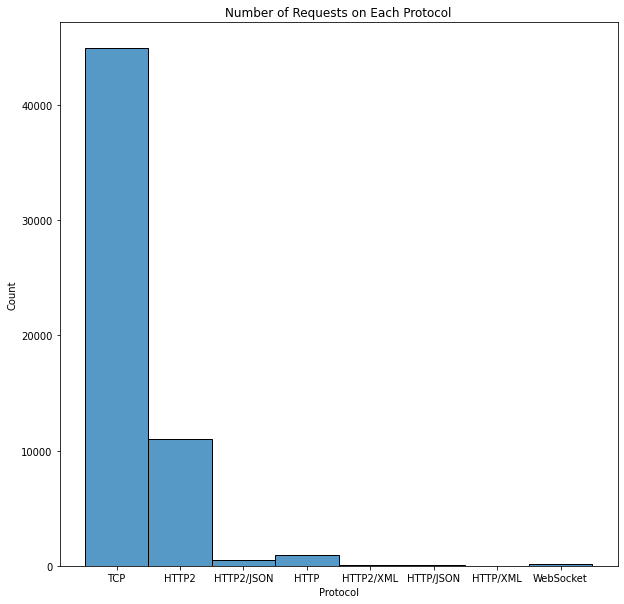

In [5]:
plt.figure(figsize=(10,10));
sns.histplot(master_traffic['Protocol']);
plt.title('Number of Requests on Each Protocol');

**In Which Sequence Were These Sites Accessed?**

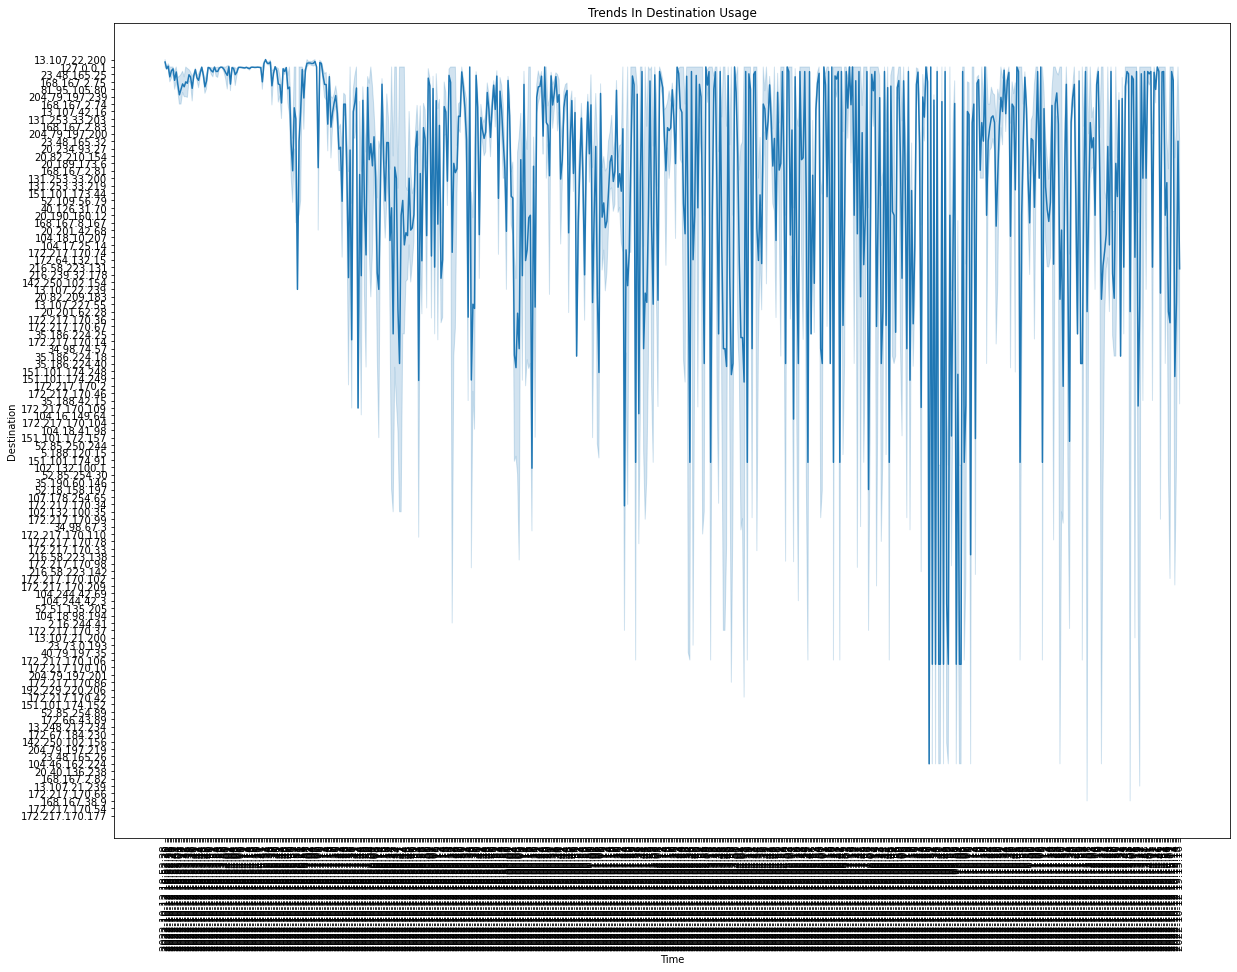

In [32]:
plt.figure(figsize=(20,15));
sns.lineplot(data=master_traffic, x=master_traffic['Time'],y=master_traffic['Destination']);
plt.xticks(rotation=90);
plt.title('Trends In Destination Usage');

**What Was The Most Frequent Source?**



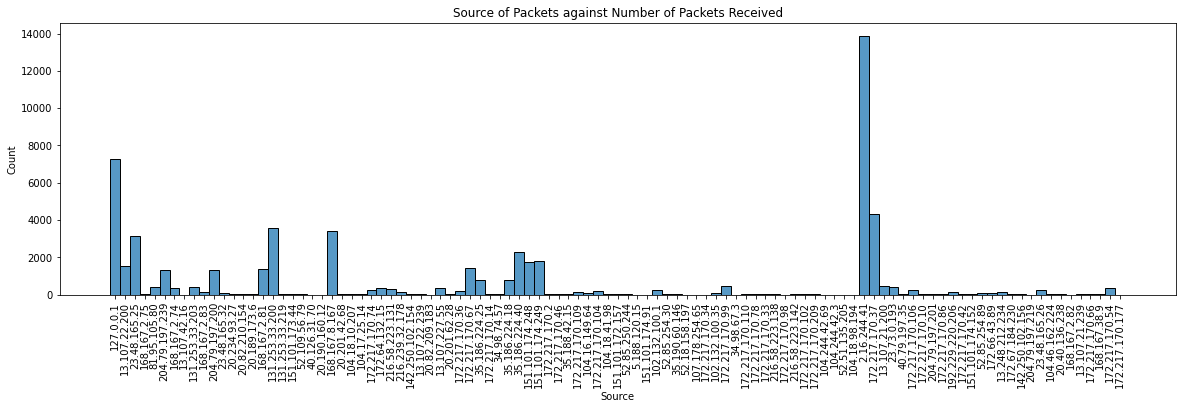

In [6]:
plt.figure(figsize=(20,5))
sns.histplot(master_traffic['Source']);
plt.xticks(rotation=90);
plt.title('Source of Packets against Number of Packets Received');

**What Was The Most Demanded Destination?**

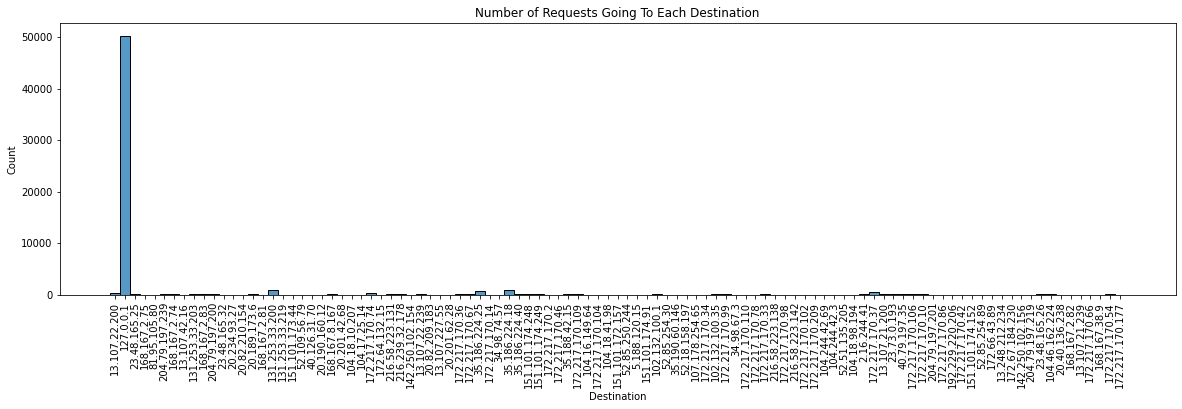

In [ ]:
plt.figure(figsize=(20,5));
sns.histplot(master_traffic['Destination']);
plt.xticks(rotation=90);1
plt.title('Number of Requests Going To Each Destination');

**Let's Analyze The Cookies**

In [7]:
http2_cookie.head()

,Time,Source,Destination,Protocol,Length,access-control-allow-origin,content-encoding,Info
0,2022-10-12 18:53:41,131.253.33.200,127.0.0.1,HTTP2,189,https://ntp.msn.com,br,"HEADERS[1]: 200 OK, DATA[1]"
1,2022-10-12 18:53:41,131.253.33.200,127.0.0.1,HTTP2,1474,https://ntp.msn.com,br,HEADERS[3]: 200 OK
2,2022-10-12 18:53:46,13.107.22.200,127.0.0.1,HTTP2,1474,https://ntp.msn.com,br,HEADERS[41]: 200 OK
3,2022-10-12 18:53:48,13.107.22.200,127.0.0.1,HTTP2,1474,https://ntp.msn.com,br,HEADERS[43]: 200 OK
4,2022-10-12 18:53:50,13.107.22.200,127.0.0.1,HTTP2,1081,https://ntp.msn.com,br,"HEADERS[45]: 200 OK, DATA[45]"


**Were There Any Trends In The Cookies Received?**


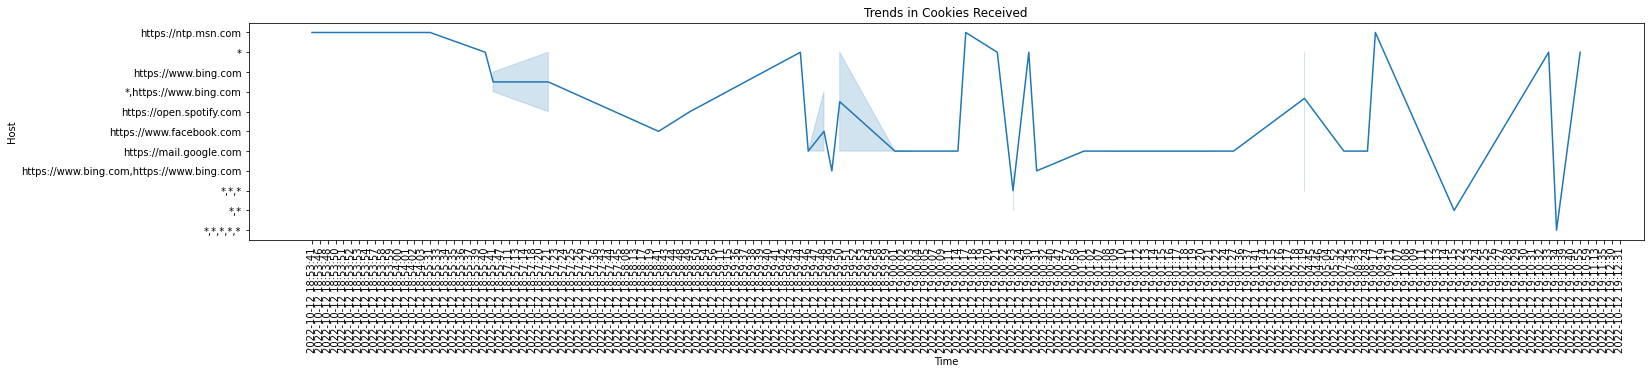

In [37]:
plt.figure(figsize=(25,4));
sns.lineplot(data=http2_cookie, x=http2_cookie['Time'], y=http2_cookie['access-control-allow-origin']);
plt.xticks(rotation=90);
plt.title('Trends in Cookies Received');
plt.ylabel('Host');

**Which Site Sent The Most Cookies?**

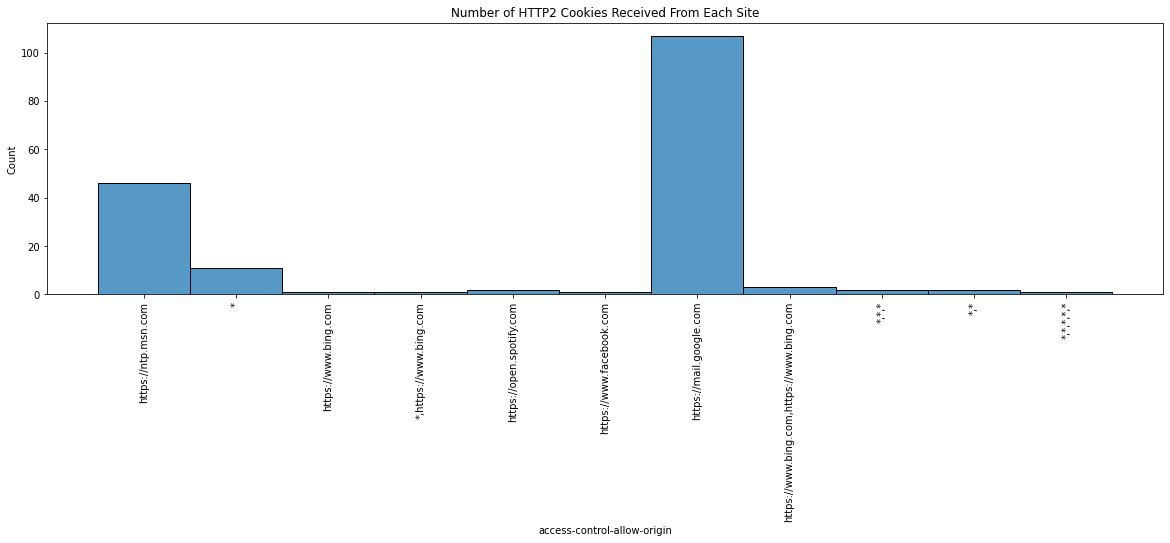

In [15]:
plt.figure(figsize=(20,5));
plt.xticks(rotation=90);
sns.histplot(http2_cookie['access-control-allow-origin']);
plt.title('Number of HTTP2 Cookies Received From Each Site');

**Let's Analyze The Length of The Cookies**

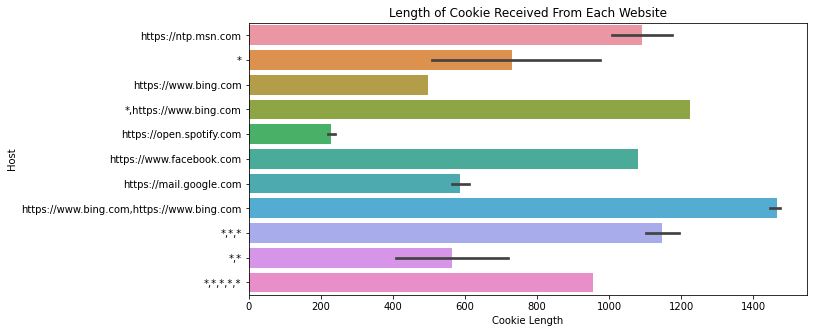

In [23]:
plt.figure(figsize=(10,5));
sns.barplot(data=http2_cookie, x=http2_cookie['Length'], y=http2_cookie['access-control-allow-origin']);
plt.ylabel('Host');
plt.xlabel('Cookie Length');
plt.title('Length of Cookie Received From Each Website');

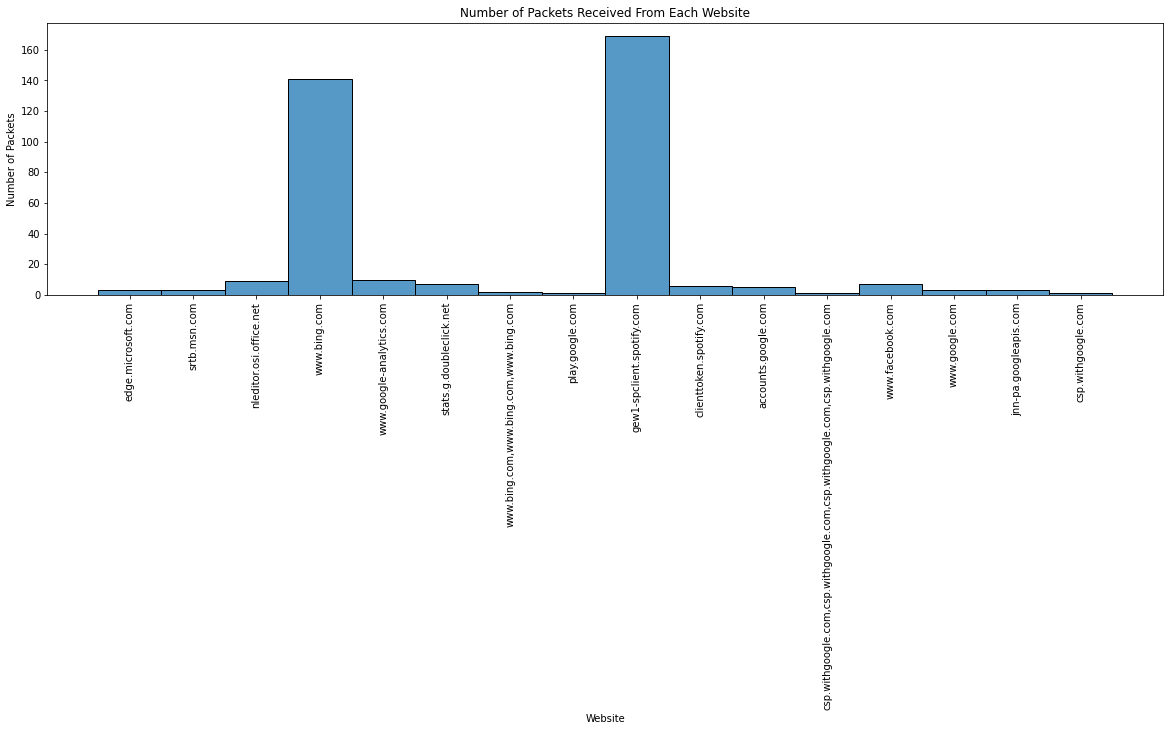

In [25]:
plt.figure(figsize=(20,5));
sns.histplot(http2[':authority']);
plt.xticks(rotation=90);
plt.xlabel('Website');
plt.ylabel('Number of Packets');
plt.title('Number of Packets Received From Each Website');

**Which Website Host Received The Highest Packet Count?**

Answer: Streaming Services, Spotify


<Figure size 1440x360 with 0 Axes>

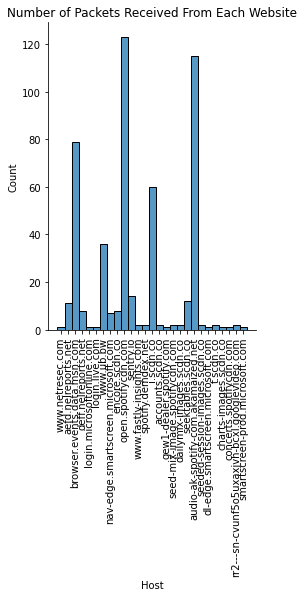

In [13]:
plt.figure(figsize=(20,5));
sns.displot(http['Host']);
plt.title('Number of Packets Received From Each Website')
plt.xticks(rotation=90);
print('Answer: Streaming Services, Spotify')

**Which Website Had The Greatest Total Packet Length?**

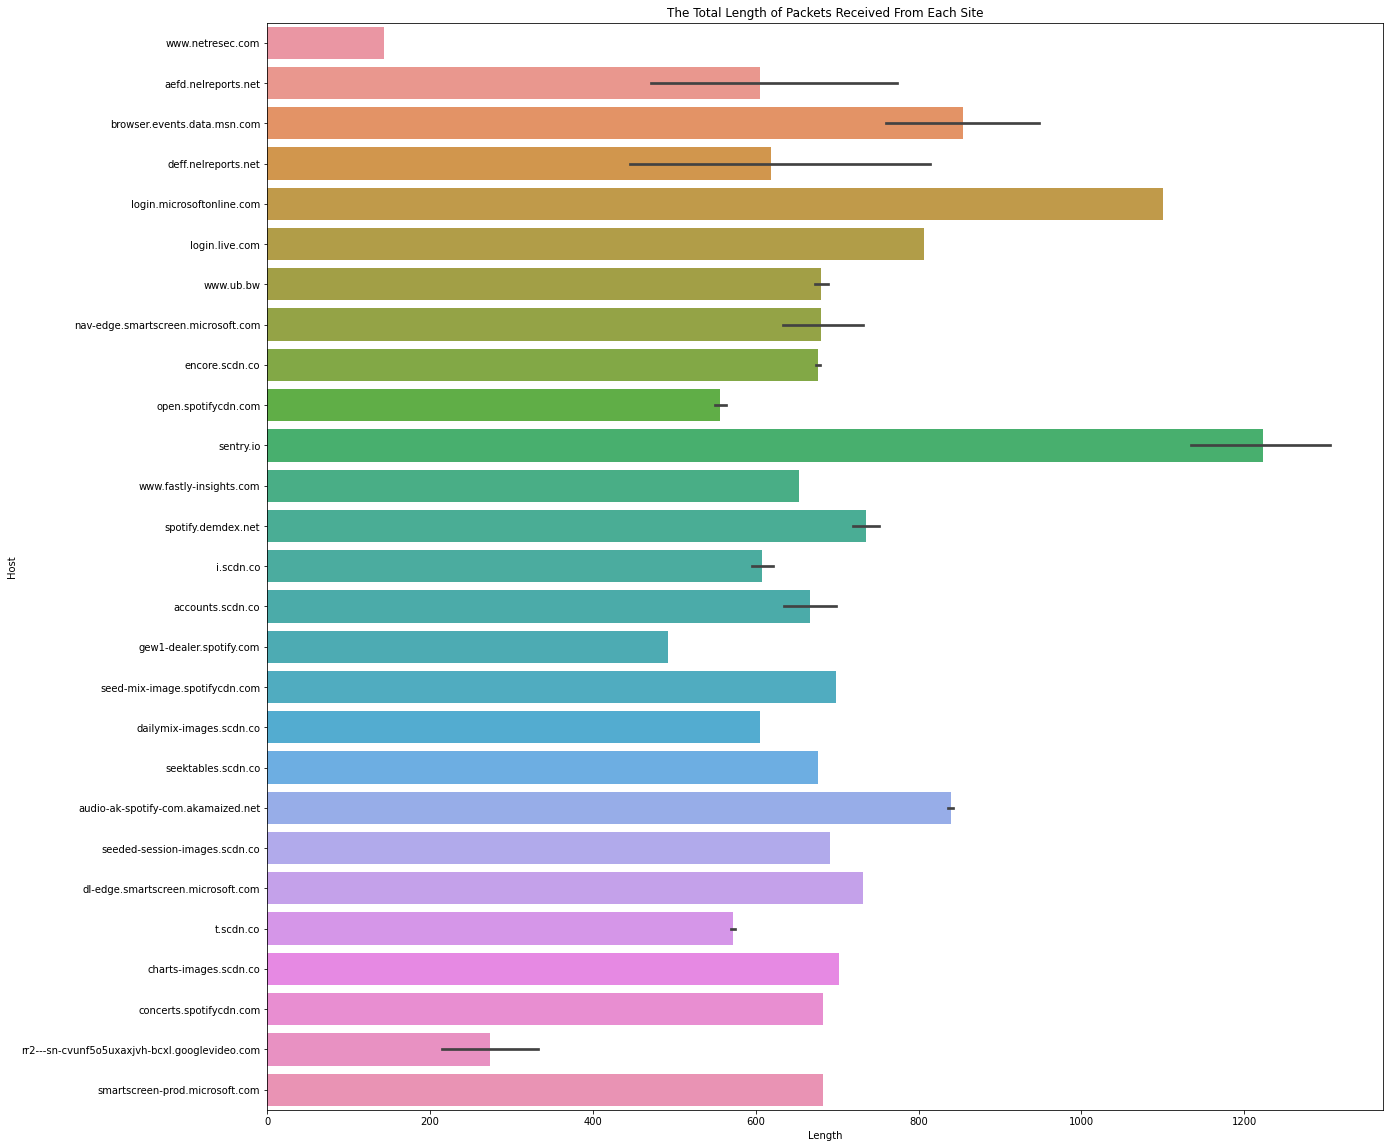

In [ ]:
plt.figure(figsize=(20,20));
sns.barplot(data=http, x="Length", y="Host");
plt.title('The Total Length of Packets Received From Each Site');

**Where There Any Trends In Website Usage?**

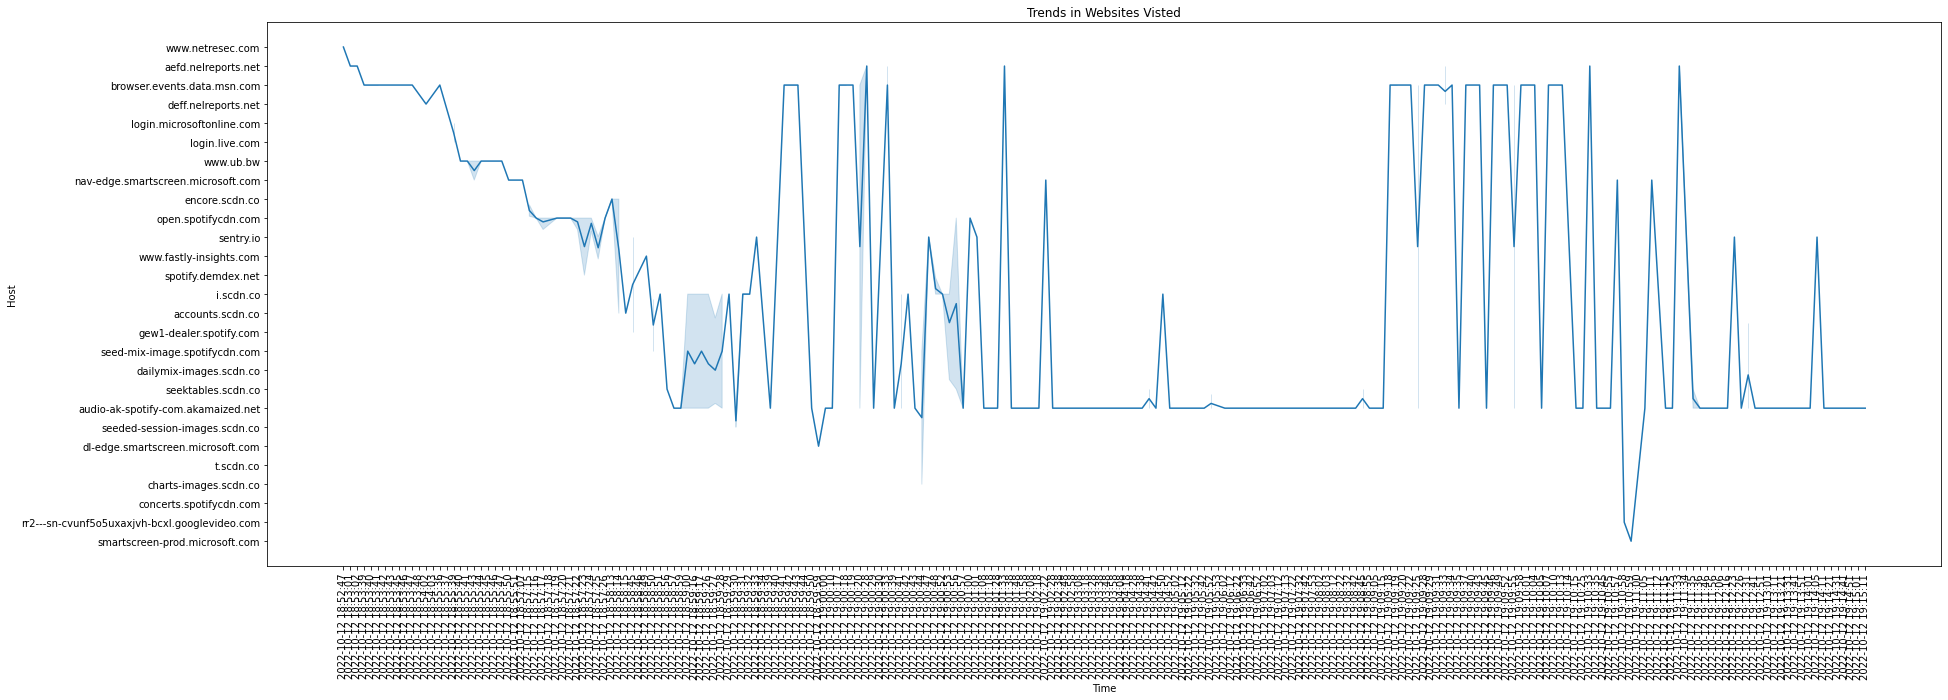

In [44]:
plt.figure(figsize=(30,10));
plt.xticks(rotation=90);
plt.title('Trends in Websites Visted');
sns.lineplot(data=http, x=http['Time'], y=http['Host']);

**What Was The Unique Destination For Each Site?**

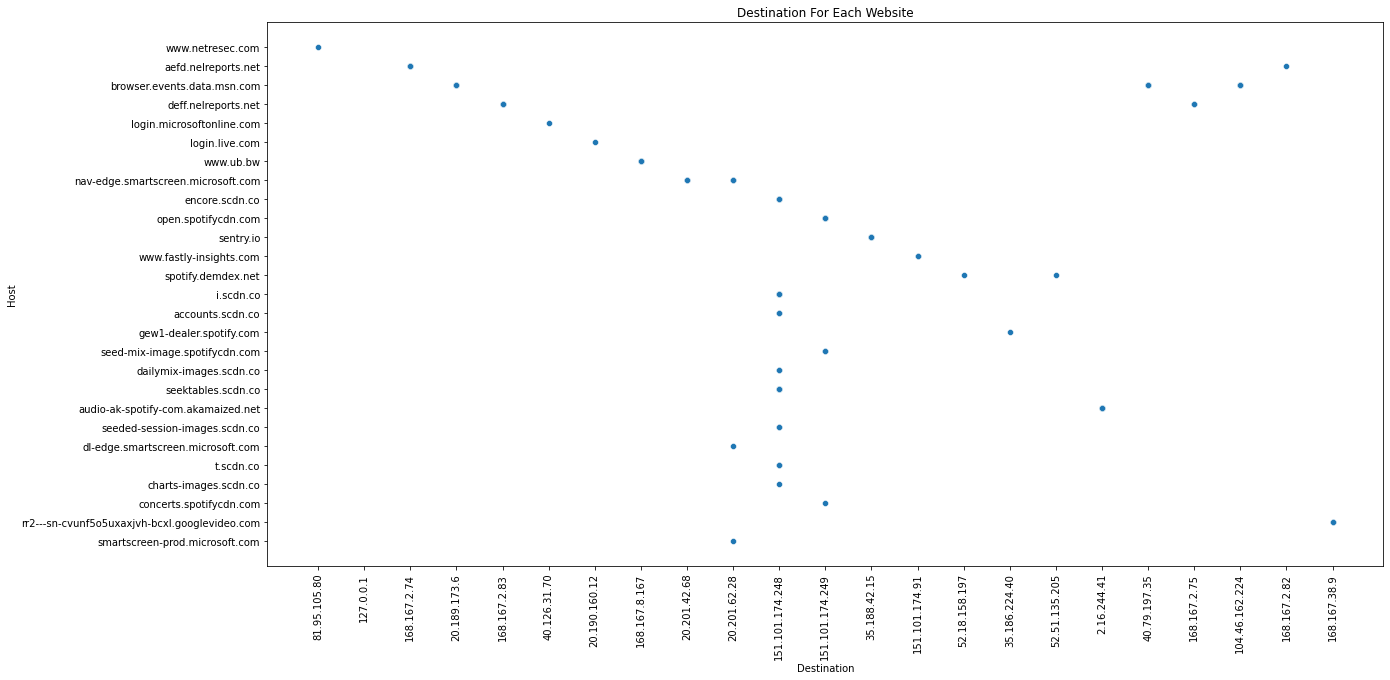

In [ ]:
plt.figure(figsize=(20,10));
sns.scatterplot(data=http, y="Host", x="Destination");
plt.title('Destination For Each Website')
plt.xticks(rotation=90);

**What Was The Length of Each Discrete Packet?**

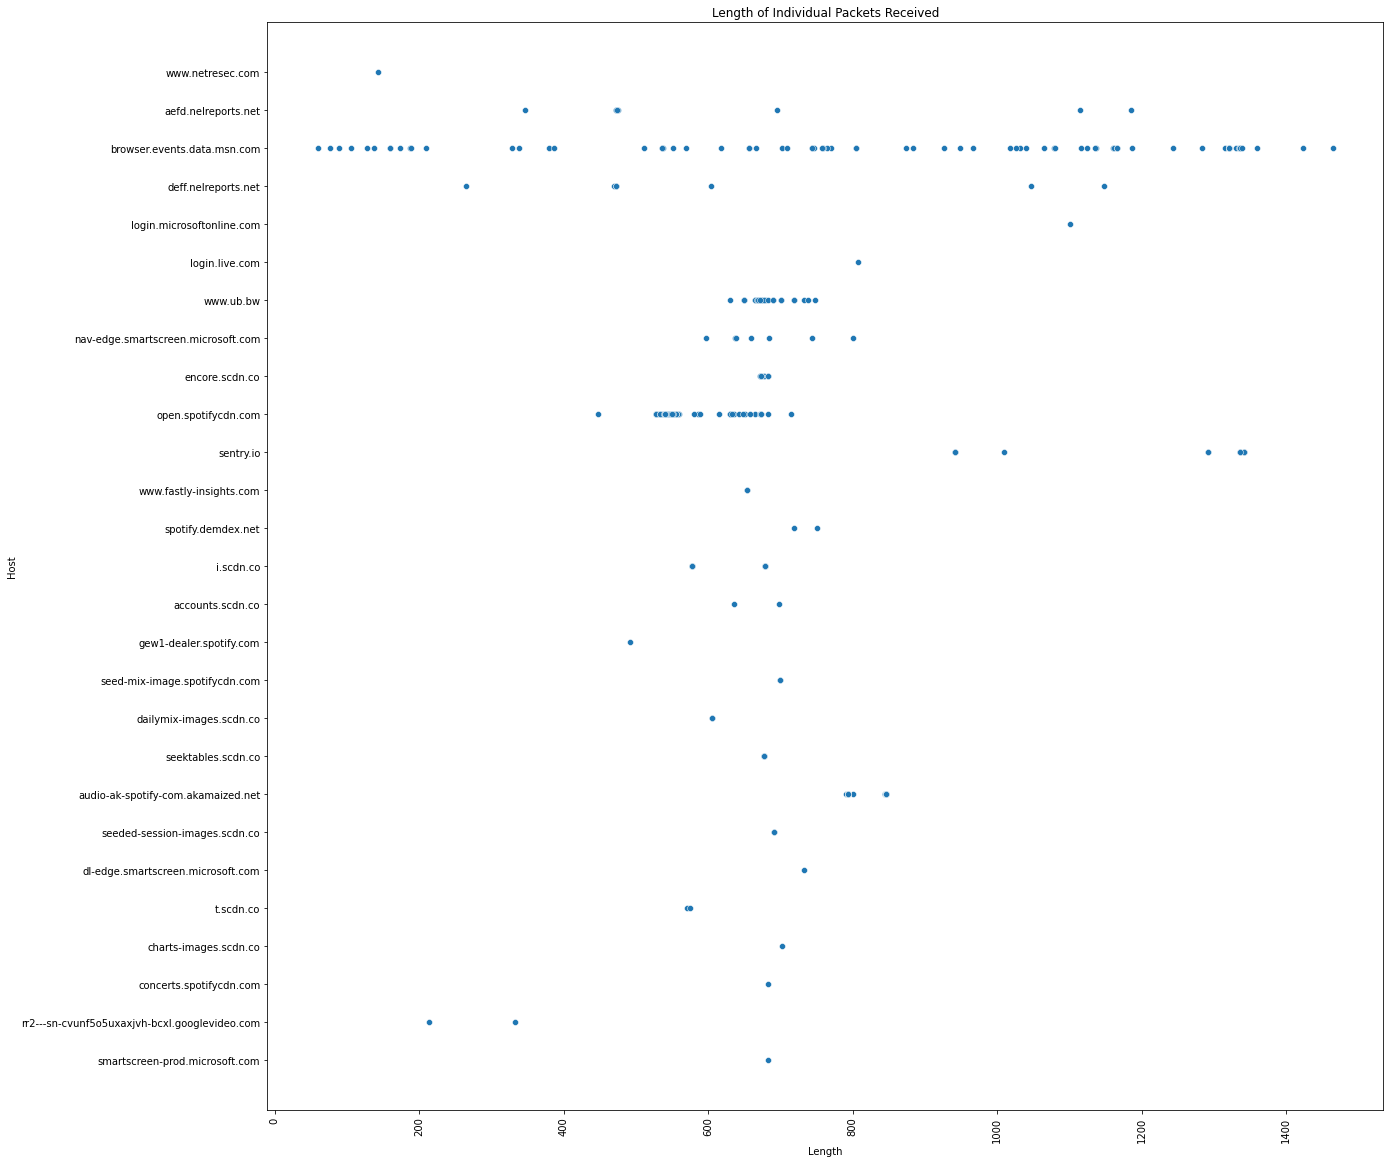

In [ ]:
plt.figure(figsize=(20,20));
sns.scatterplot(data=http, y="Host", x="Length");
plt.xticks(rotation=90);
plt.title('Length of Individual Packets Received');

In [26]:
http2_query.head()

,Time,Source,Destination,Protocol,Length,:authority,Path sub segment,Info
0,2022-10-12 18:52:29,127.0.0.1,168.167.2.75,HTTP2,562,img-s-msn-com.akamaized.net,"w=16,h=16,q=100,m=6,f=png,u=t","Magic, SETTINGS[0], WINDOW_UPDATE[0], HEADERS[..."
1,2022-10-12 18:52:54,127.0.0.1,204.79.197.239,HTTP2,1474,edge.microsoft.com,cup2key=,"Magic, SETTINGS[0], WINDOW_UPDATE[0], HEADERS[..."
2,2022-10-12 18:53:41,127.0.0.1,168.167.2.83,HTTP2,860,"img-s-msn-com.akamaized.net,img-s-msn-com.akam...","w=16,h=16,q=100,m=6,f=png,u=t,w=16,h=16,q=100,...",HEADERS[1]: GET /tenant/amp/entityid/AA12s9Oa?...
3,2022-10-12 18:53:43,127.0.0.1,168.167.2.83,HTTP2,130,img-s-msn-com.akamaized.net,"w=624,h=350,q=60,m=6,f=jpg,u=t",HEADERS[13]: GET /tenant/amp/entityid/BB14SIpB...
4,2022-10-12 18:53:43,127.0.0.1,168.167.2.83,HTTP2,130,img-s-msn-com.akamaized.net,"w=624,h=350,q=60,m=6,f=jpg,u=t",HEADERS[15]: GET /tenant/amp/entityid/BB14VAIf...


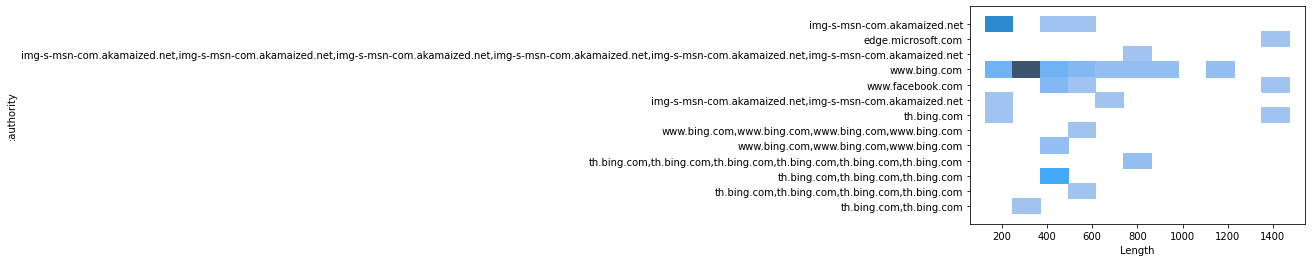

In [27]:
sns.histplot(data=http2_query, x=http2_query['Length'], y=http2_query[':authority']);

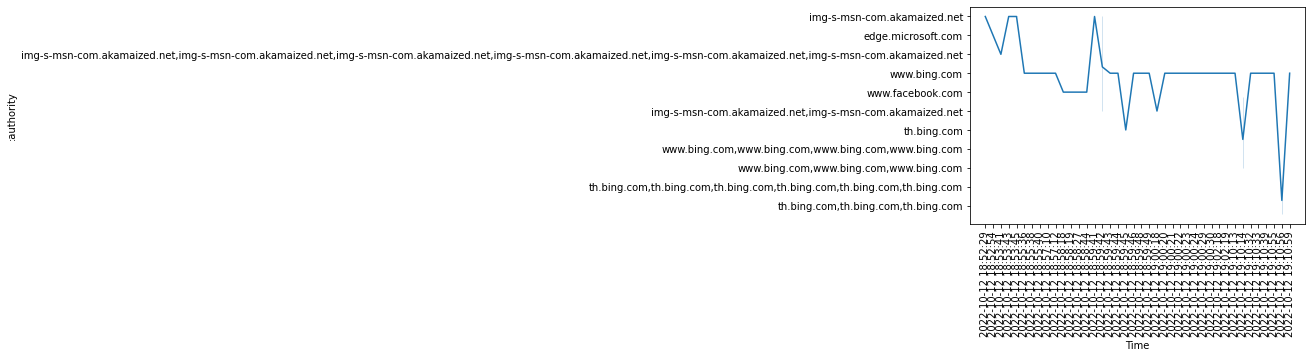

In [29]:
sns.lineplot(data=http2_query, x=http2_query['Time'], y=http2_query[':authority']);
plt.xticks(rotation=90);